# Quantum Statistical Potential Simulation

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/QSP/input_files/QSP_cgs.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/QSP/QSP_Tutorial.ipynb).

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os

plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess

# Create the file path to the YAML input file
input_file_name = os.path.join('input_files',  'QSP_cgs.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# sim = PreProcess(input_file_name)
# sim.setup(read_yaml=True)
# sim.run(loops = 20,
#     pppm_estimate=True)

In [3]:
# sim = Simulation(input_file_name)
# sim.setup(read_yaml=True)
# sim.run()

In [4]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

In [5]:
# Equilibration check
postproc.therm.setup(postproc.parameters)
# postproc.therm.temp_energy_plot(postproc, phase='equilibration')

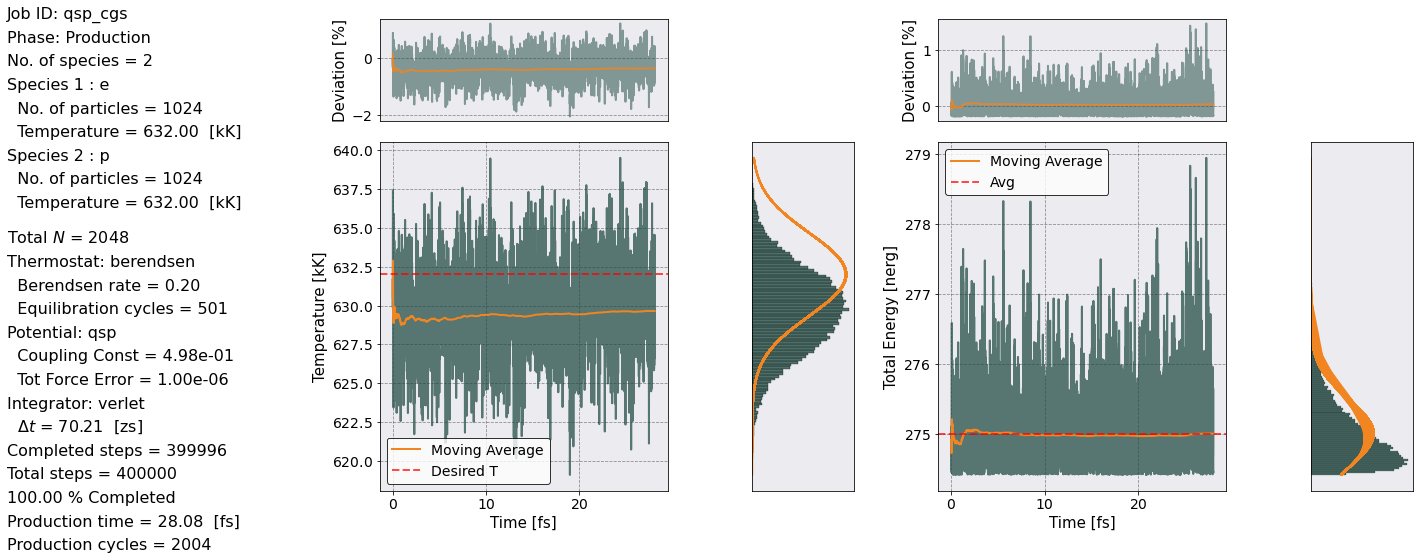

In [6]:
# Production check
postproc.therm.temp_energy_plot(postproc, phase='production')

In [7]:
# Radial Distribution Function 
postproc.rdf.setup(postproc.parameters)
postproc.rdf.compute()
# Grab HNC data for comparison
hnc_r, hnc_gee, hnc_gei, hnc_gii = np.loadtxt('hnc_gall.out', unpack=True)

  0%|          | 0/1 [00:00<?, ?it/s]


Radial Distribution Function Calculation Time: 0 sec 62 msec 25 usec 174 nsec


[(-0.2, 6.0),
 Text(0.5, 135.8333333333334, '$r/a_e$'),
 Text(61.22856648763023, 0.5, '$g(r)$')]

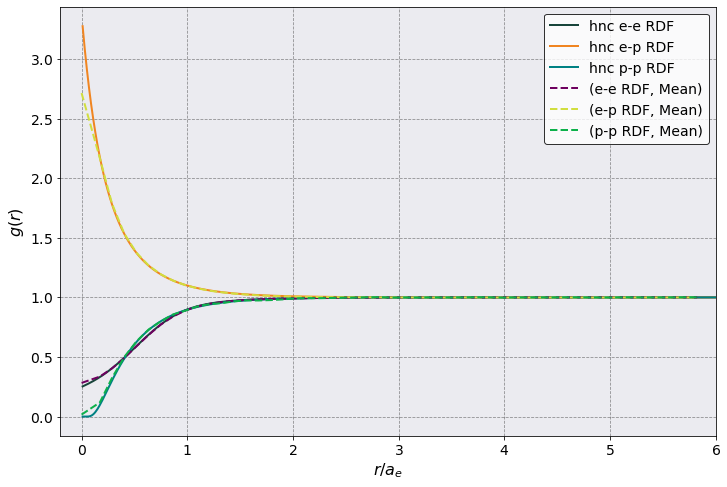

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(hnc_r , hnc_gee, label = 'hnc e-e RDF')
ax.plot(hnc_r , hnc_gei, label = 'hnc e-p RDF')
ax.plot(hnc_r , hnc_gii, label = 'hnc p-p RDF')
postproc.rdf.plot(scaling = postproc.parameters.electron_WS_radius, 
                  y = [('e-e RDF', "Mean"),
                       ('e-p RDF', "Mean"),
                       ('p-p RDF', "Mean")
                      ],
                  ax = ax, 
                  ls = '--')
ax.legend()
ax.set(xlim = (-0.2, 6), xlabel = r'$r/a_e$', ylabel = r"$g(r)$")

In [9]:
from sarkas.tools.observables import ElectricCurrent
from sarkas.tools.transport import TransportCoefficients

In [10]:
ec = ElectricCurrent()
ec.setup(postproc.parameters, no_slices = 4)
#ec.compute()
ec.parse()


In [11]:
ec.dataframe

Time e Electric Current                                \
                NaN                  X                   Y             
                NaN               Mean       Std      Mean       Std   
0      0.000000e+00          -1.592979  4.266312  0.313781  4.696336   
1      4.212480e-19          -1.556820  4.255951  0.261228  4.727619   
2      8.424960e-19          -1.514293  4.250659  0.212417  4.757823   
3      1.263744e-18          -1.470321  4.251131  0.169078  4.780538   
4      1.684992e-18          -1.428866  4.254351  0.127651  4.795915   
...             ...                ...       ...       ...       ...   
16661  7.018413e-15          -5.074025  6.949550  1.247491  4.710895   
16662  7.018834e-15          -5.047354  6.958353  1.189807  4.720378   
16663  7.019255e-15          -5.019247  6.964106  1.131542  4.733726   
16664  7.019677e-15          -4.991651  6.969232  1.069791  4.753368   
16665  7.020098e-15          -4.965582  6.977188  1.003926  4.777691   

                          p Electric Current                                \
              Z                            X                   Y             
           Mean       Std               Mean       Std      Mean       Std   
0      2.091885  4.912189          -0.000868  0.002324  0.000171  0.002558   
1      2.129823  4.919757          -0.000848  0.002318  0.000142  0.002575   
2      2.165856  4.927102          -0.000825  0.002315  0.000116  0.002591   
3      2.200074  4.932380          -0.000801  0.002315  0.000092  0.002604   
4      2.235364  4.932165          -0.000778  0.002317  0.000070  0.002612   
...         ...       ...                ...       ...       ...       ...   
16661  2.787523  4.774233          -0.002763  0.003785  0.000679  0.002566   
16662  2.837681  4.749905          -0.002749  0.003790  0.000648  0.002571   
16663  2.891892  4.732832          -0.002734  0.003793  0.000616  0.002578   
16664  2.948593  4.725178          -0.002719  0.003796  0.000583  0.002589   
16665  3.006825  4.728724          -0.002704  0.003800  0.000547  0.002602   

                          Electric Current                                \
              Z                          X                   Y             
           Mean       Std             Mean       Std      Mean       Std   
0      0.001139  0.002675        -1.593846  4.268636  0.313952  4.698894   
1      0.001160  0.002679        -1.557668  4.258269  0.261370  4.730193   
2      0.001180  0.002683        -1.515118  4.252974  0.212533  4.760414   
3      0.001198  0.002686        -1.471122  4.253446  0.169170  4.783142   
4      0.001217  0.002686        -1.429644  4.256668  0.127721  4.798526   
...         ...       ...              ...       ...       ...       ...   
16661  0.001518  0.002600        -5.076789  6.953335  1.248170  4.713460   
16662  0.001545  0.002587        -5.050103  6.962143  1.190455  4.722948   
16663  0.001575  0.002578        -5.021981  6.967898  1.132158  4.736304   
16664  0.001606  0.002573        -4.994370  6.973027  1.070374  4.755957   
16665  0.001638  0.002575        -4.968286  6.980988  1.004473  4.780293   

                           
              Z            
           Mean       Std  
0      2.093025  4.914864  
1      2.130983  4.922436  
2      2.167036  4.929785  
3      2.201272  4.935066  
4      2.236581  4.934851  
...         ...       ...  
16661  2.789041  4.776834  
16662  2.839226  4.752492  
16663  2.893467  4.735410  
16664  2.950199  4.727751  
16665  3.008462  4.731299  

[16666 rows x 19 columns]



====================== Electrical Conductivity ======================= 

Data saved in: 
 Simulations/qsp_cgs/PostProcessing/TransportCoefficients/Production/ElectricalConductivity_qsp_cgs.h5
Simulations/qsp_cgs/PostProcessing/TransportCoefficients/Production/ElectricalConductivity_slices_qsp_cgs.h5

No. of slices = 4
No. dumps per slice = 2777
Time interval of autocorrelation function = 7.0205e-15 [s] ~ 501 w_p T


  0%|          | 0/4 [00:00<?, ?it/s]

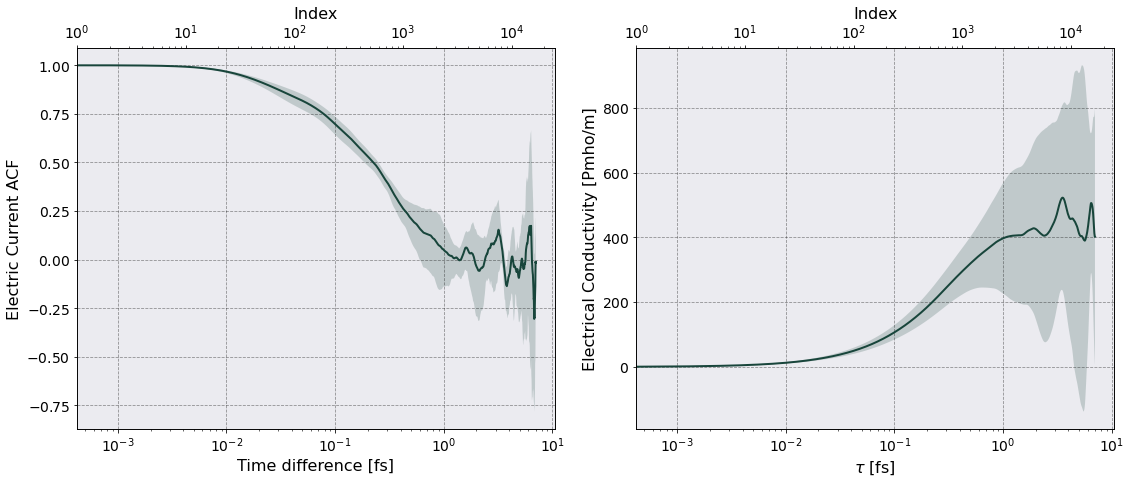

In [12]:
tc = TransportCoefficients(postproc.parameters)
tc.electrical_conductivity(ec, "ElectricalConductivity")

In [13]:
tc.conductivity_df

Time Electrical Conductivity              
                NaN                    Mean           Std
0      0.000000e+00            0.000000e+00  0.000000e+00
1      4.212480e-19            0.000000e+00  0.000000e+00
2      8.424960e-19            5.412416e+14  9.348701e+13
3      1.263744e-18            1.082391e+15  1.869658e+14
4      1.684992e-18            1.623361e+15  2.804388e+14
...             ...                     ...           ...
16661  7.018413e-15            4.022931e+17  3.956391e+17
16662  7.018834e-15            4.022840e+17  3.957253e+17
16663  7.019255e-15            4.022752e+17  3.958105e+17
16664  7.019677e-15            4.022667e+17  3.958949e+17
16665  7.020098e-15            4.022586e+17  3.959783e+17

[16666 rows x 3 columns]

[Text(0.5, 0, '$\\tau$ [fs]'), Text(0, 0.5, ' $\\sigma/\\omega_p$')]

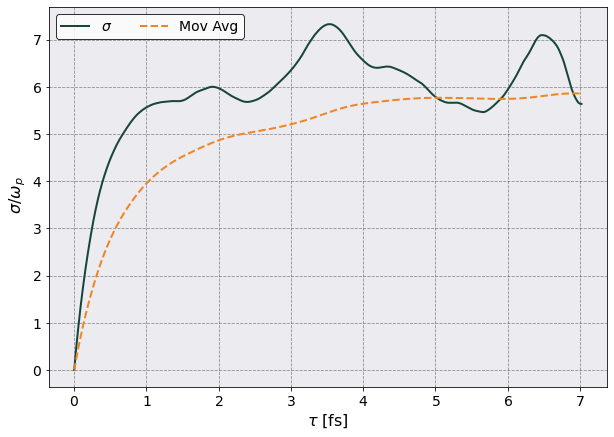

In [14]:
rescaling = 1.0/ec.total_plasma_frequency
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(tc.conductivity_df["Time"].iloc[:,0]*1e15, 
        tc.conductivity_df[("Electrical Conductivity", "Mean")] * rescaling,
       label = r'$\sigma$')

ax.plot(tc.conductivity_df["Time"].iloc[:,0]*1e15, tc.conductivity_df[("Electrical Conductivity", "Mean")].expanding().mean() * rescaling,
        ls = '--', label = r'Mov Avg')

ax.legend(ncol = 2)
ax.set(xlabel = r"$\tau$ [fs]",ylabel = r" $\sigma/\omega_p$")